In [1]:
# load data from test and train csv files

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Load data
def load_data():
    train = pd.read_csv('../playground-series-s4e5/train.csv')
    test = pd.read_csv('../playground-series-s4e5/test.csv')
    return train, test


train, test = load_data() # load data
X_train     = train.drop('FloodProbability', axis=1) # drop the target column
y_train  = train['FloodProbability'] # target column
X_test  = test.drop('FloodProbability', axis=1, errors='ignore') # drop the target column
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42) # split the data

In [3]:
# Define the hyperparameters to search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}

model = LinearRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': True}
Best score:  0.8448854664445694


In [4]:
# Train the model with the best parameters
model = LinearRegression(**grid_search.best_params_)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
print(r2_score(y_test, predictions)) # print the r2 score

0.8450696033460731


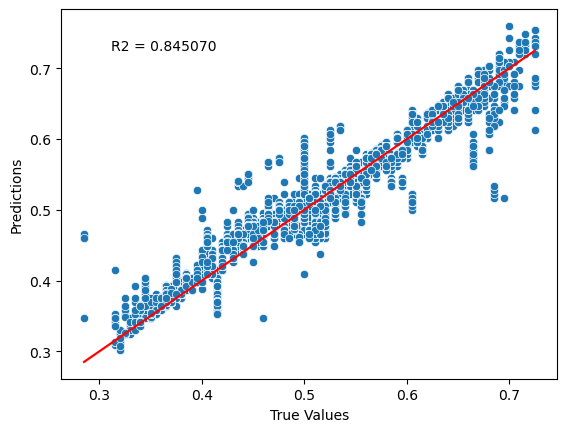

In [5]:
#plot the predictions
sns.scatterplot(x=y_test, y=predictions)
#draw regression line
sns.lineplot(x=y_test, y=y_test, color='red')
#show R2 score inside the plot
plt.text(0.1, 0.9, 'R2 = %f' % r2_score(y_test, predictions), ha='left', va='center', transform=plt.gca().transAxes)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [6]:
## Save to CSV
#call the id column from the test data
ids = test['id']

# Combine ids and predictions into a structured array
combined_data = np.array(list(zip(ids, predictions)), dtype=[('id', int), ('FloodProbability', int)])

# Define the header
header = 'id,FloodProbability'

# Save to CSV with header
np.savetxt('submission.csv', combined_data, delimiter=',', header=header, fmt='%d,%.2f', comments='')